In [1]:
import os
import glob
import h5py
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from keras import backend as K

import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.core import Flatten, Dense, Activation, Reshape

import tensorflow as tf
import yolo.config as cfg

Using TensorFlow backend.


In [2]:
keras.backend.set_image_dim_ordering('th')
weights_path = 'yolo-tiny-origin.h5'
is_freeze = True

In [3]:
model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=(3,448,448),padding='same', 
                        activation=LeakyReLU(alpha=0.1), trainable=not is_freeze))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32,(3,3), padding='same', 
                        activation=LeakyReLU(alpha=0.1), trainable=not is_freeze))
model.add(MaxPooling2D(pool_size=(2, 2),padding='valid'))
model.add(Conv2D(64,(3,3), padding='same', 
                        activation=LeakyReLU(alpha=0.1), trainable=not is_freeze))
model.add(MaxPooling2D(pool_size=(2, 2),padding='valid'))
model.add(Conv2D(128,(3,3), padding='same', 
                        activation=LeakyReLU(alpha=0.1), trainable=not is_freeze))
model.add(MaxPooling2D(pool_size=(2, 2),padding='valid'))
model.add(Conv2D(256,(3,3), padding='same', 
                        activation=LeakyReLU(alpha=0.1), trainable=not is_freeze))
model.add(MaxPooling2D(pool_size=(2, 2),padding='valid'))
model.add(Conv2D(512,(3,3), padding='same', 
                        activation=LeakyReLU(alpha=0.1), trainable=not is_freeze))
model.add(MaxPooling2D(pool_size=(2, 2),padding='valid'))
model.add(Conv2D(1024,(3,3), padding='same', activation=LeakyReLU(alpha=0.1), trainable=not is_freeze))
model.add(Conv2D(1024,(3,3), padding='same', activation=LeakyReLU(alpha=0.1), trainable=not is_freeze))
model.add(Conv2D(1024,(3,3), padding='same', activation=LeakyReLU(alpha=0.1), trainable=not is_freeze))
model.add(Flatten())
model.add(Dense(256))
model.add(Dense(4096))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(1470))

## Test original weights file

In [4]:
model.load_weights(weights_path)

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 16, 448, 448)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 224, 224)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 224, 224)      4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 112, 112)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 112, 112)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 56, 56)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 128, 56, 56)       73856     
__________

In [6]:
from utils.BoxUtils import post_progress

base :  3
('aeroplane', (254.0, 254.0, 254))
('bicycle', (239.88888888888889, 211.66666666666669, 127))
('bird', (225.77777777777777, 169.33333333333334, 0))
('boat', (211.66666666666669, 127.0, 254))
('bottle', (197.55555555555557, 84.66666666666667, 127))
('bus', (183.44444444444443, 42.33333333333332, 0))
('car', (169.33333333333334, 0.0, 254))
('cat', (155.22222222222223, -42.33333333333335, 127))
('chair', (141.11111111111111, -84.66666666666664, 0))
('cow', (127.0, 254.0, 254))
('diningtable', (112.88888888888889, 211.66666666666669, 127))
('dog', (98.77777777777777, 169.33333333333334, 0))
('horse', (84.66666666666667, 127.0, 254))
('motorbike', (70.55555555555556, 84.66666666666667, 127))
('person', (56.44444444444444, 42.33333333333332, 0))
('pottedplant', (42.33333333333332, 0.0, 254))
('sheep', (28.222222222222236, -42.33333333333335, 127))
('sofa', (14.111111111111118, -84.66666666666664, 0))
('train', (0.0, 254.0, 254))
('tvmonitor', (-14.111111111111118, 211.6666666666666

1 (424, 640, 3)
2 (448, 448, 3)
3 (3, 448, 448)
4 (1, 3, 448, 448)


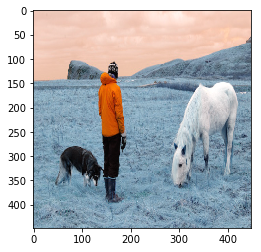

In [7]:
imagePath = './test/my_testset/person.jpg'
image = cv2.imread(imagePath)
print("1", image.shape)
resized = cv2.resize(image,(448,448))
plt.imshow(resized)
print("2", resized.shape)
np_img = cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)
batch = np.transpose(np_img,(2,0,1))
print("3", batch.shape)
batch = 2*(batch/255.) - 1
batch = np.expand_dims(batch, axis=0)
print("4", batch.shape)

In [8]:
out = model.predict(batch)
print("5", out.shape)

5 (1, 1470)


max_index: 16, left: 412, top: 134, right: 592, bottom: 330
max_index: 11, left: 68, top: 241, right: 227, bottom: 372
max_index: 14, left: 184, top: 112, right: 294, bottom: 333
max_index: 11, left: 133, top: 274, right: 278, bottom: 374
max_index: 11, left: 408, top: 159, right: 579, bottom: 331
6 (424, 640, 3)


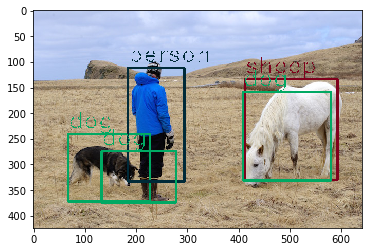

In [9]:
out_img = post_progress(out[0], im=image, is_save=False, threshold=0.1)
print("6", out_img.shape)
out_img = cv2.cvtColor(out_img, cv2.COLOR_BGR2RGB)
plt.imshow(out_img)

## Test step1 save weights file

In [18]:
weigths_path2 = 'yolo-tiny-epoch1.h5'
model.load_weights(weigths_path2)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 16, 448, 448)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 224, 224)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 224, 224)      4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 112, 112)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 112, 112)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 56, 56)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 128, 56, 56)       73856     
__________

1 (424, 640, 3)
2 (448, 448, 3)
3 (3, 448, 448)
4 (1, 3, 448, 448)
5 (1, 1470)
6 (424, 640, 3)


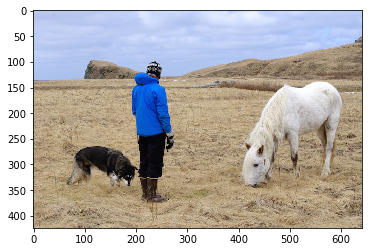

In [24]:
imagePath = './test/my_testset/person.jpg'
image = cv2.imread(imagePath)
print("1", image.shape)
resized = cv2.resize(image,(448,448))
plt.imshow(resized)
print("2", resized.shape)
np_img = cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)
batch = np.transpose(np_img,(2,0,1))
print("3", batch.shape)
batch = 2*(batch/255.) - 1
batch = np.expand_dims(batch, axis=0)
print("4", batch.shape)
out = model.predict(batch)
print("5", out.shape)

out_img = post_progress(out[0], im=image, is_save=False, threshold=0.1)
print("6", out_img.shape)
out_img = cv2.cvtColor(out_img, cv2.COLOR_BGR2RGB)
plt.imshow(out_img)